In [38]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [30]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#下記は決定木可視化のためのツール
from IPython.display import Image
from sklearn.externals.six import StringIO

//anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [23]:
df = pd.read_csv('Aeropress.csv')
df = pd.get_dummies(df, columns=['Position'])
df

,Competitor,Year,Coffee_Usage,Water_Usage,Temperature,Total_Time,Grind,Bolivia,Brazil,Burundi,...,Nicaragua,Panama,Rwanda,Thailand,Venezuela,Metal,Paper,Position_Inverted,Position_Inverted×Upright,Position_Upright
0,AUSTRALIAN,2017,20.0,220.0,85,120,0.400,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,AUSTRIAN,2017,30.0,240.0,85,60,0.500,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,BELARUS,2017,17.0,210.0,92,135,0.400,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,BELGIAN,2017,30.0,230.0,90,70,0.800,0,0,0,...,0,0,0,0,0,1,2,1,0,0
4,BRAZILIAN,2017,30.0,270.0,83,75,0.800,0,1,0,...,0,0,0,0,0,0,1,0,0,1
5,CANADIAN,2017,34.0,160.0,86,90,0.800,0,0,0,...,0,0,0,0,0,0,1,1,0,0
6,CHINA,2017,30.0,260.0,83,130,0.000,0,0,0,...,0,0,0,0,0,0,1,0,0,1
7,COLOMBIAN,2017,30.0,280.0,90,165,0.500,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8,CZECH,2017,18.0,240.0,88,114,0.500,0,0,0,...,0,0,0,0,0,0,2,0,0,1
9,DANISH,2017,20.0,230.0,80,90,0.800,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [18]:
data = df[['Coffee_Usage', 'Water_Usage', 'Temperature', 'Total_Time', 'Grind', 'Metal', 'Paper', 'Position_Inverted', 'Position_Upright']]
data

,Coffee_Usage,Water_Usage,Temperature,Total_Time,Grind,Metal,Paper,Position_Inverted,Position_Upright
0,20.0,220.0,85,120,0.400,0,1,1,0
1,30.0,240.0,85,60,0.500,0,1,1,0
2,17.0,210.0,92,135,0.400,0,1,0,1
3,30.0,230.0,90,70,0.800,1,2,1,0
4,30.0,270.0,83,75,0.800,0,1,0,1
5,34.0,160.0,86,90,0.800,0,1,1,0
6,30.0,260.0,83,130,0.000,0,1,0,1
7,30.0,280.0,90,165,0.500,0,1,1,0
8,18.0,240.0,88,114,0.500,0,2,0,1
9,20.0,230.0,80,90,0.800,0,1,0,1


In [20]:
corr = data.corr()
corr.style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Coffee_Usage,Water_Usage,Temperature,Total_Time,Grind,Metal,Paper,Position_Inverted,Position_Upright
Coffee_Usage,1.0,0.093,-0.11,-0.19,0.23,0.1,-0.037,0.088,-0.065
Water_Usage,0.093,1.0,-0.15,0.09,-0.13,0.043,0.13,-0.26,0.25
Temperature,-0.11,-0.15,1.0,-0.042,-0.048,0.02,0.0027,0.12,-0.12
Total_Time,-0.19,0.09,-0.042,1.0,-0.015,-0.053,-0.041,0.032,-0.047
Grind,0.23,-0.13,-0.048,-0.015,1.0,-0.076,-0.17,0.12,-0.12
Metal,0.1,0.043,0.02,-0.053,-0.076,1.0,-0.16,0.066,-0.059
Paper,-0.037,0.13,0.0027,-0.041,-0.17,-0.16,1.0,-0.18,0.16
Position_Inverted,0.088,-0.26,0.12,0.032,0.12,0.066,-0.18,1.0,-0.98
Position_Upright,-0.065,0.25,-0.12,-0.047,-0.12,-0.059,0.16,-0.98,1.0


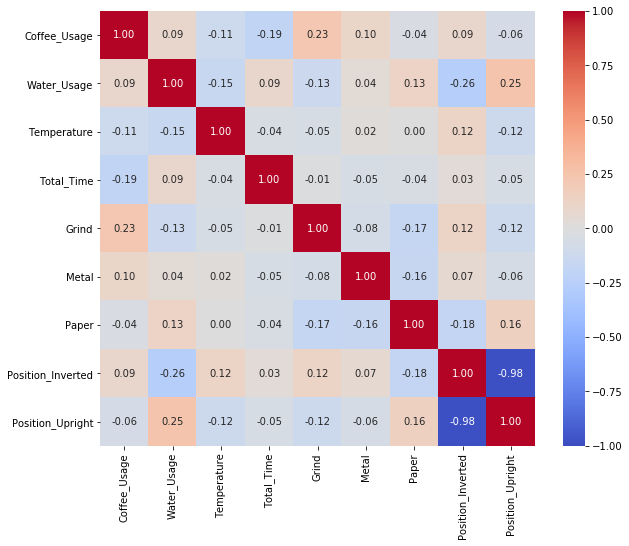

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, vmax=1, vmin=-1, center=0, annot=True, cbar=True, cmap='coolwarm', square=True, fmt='.2f', ax=ax)

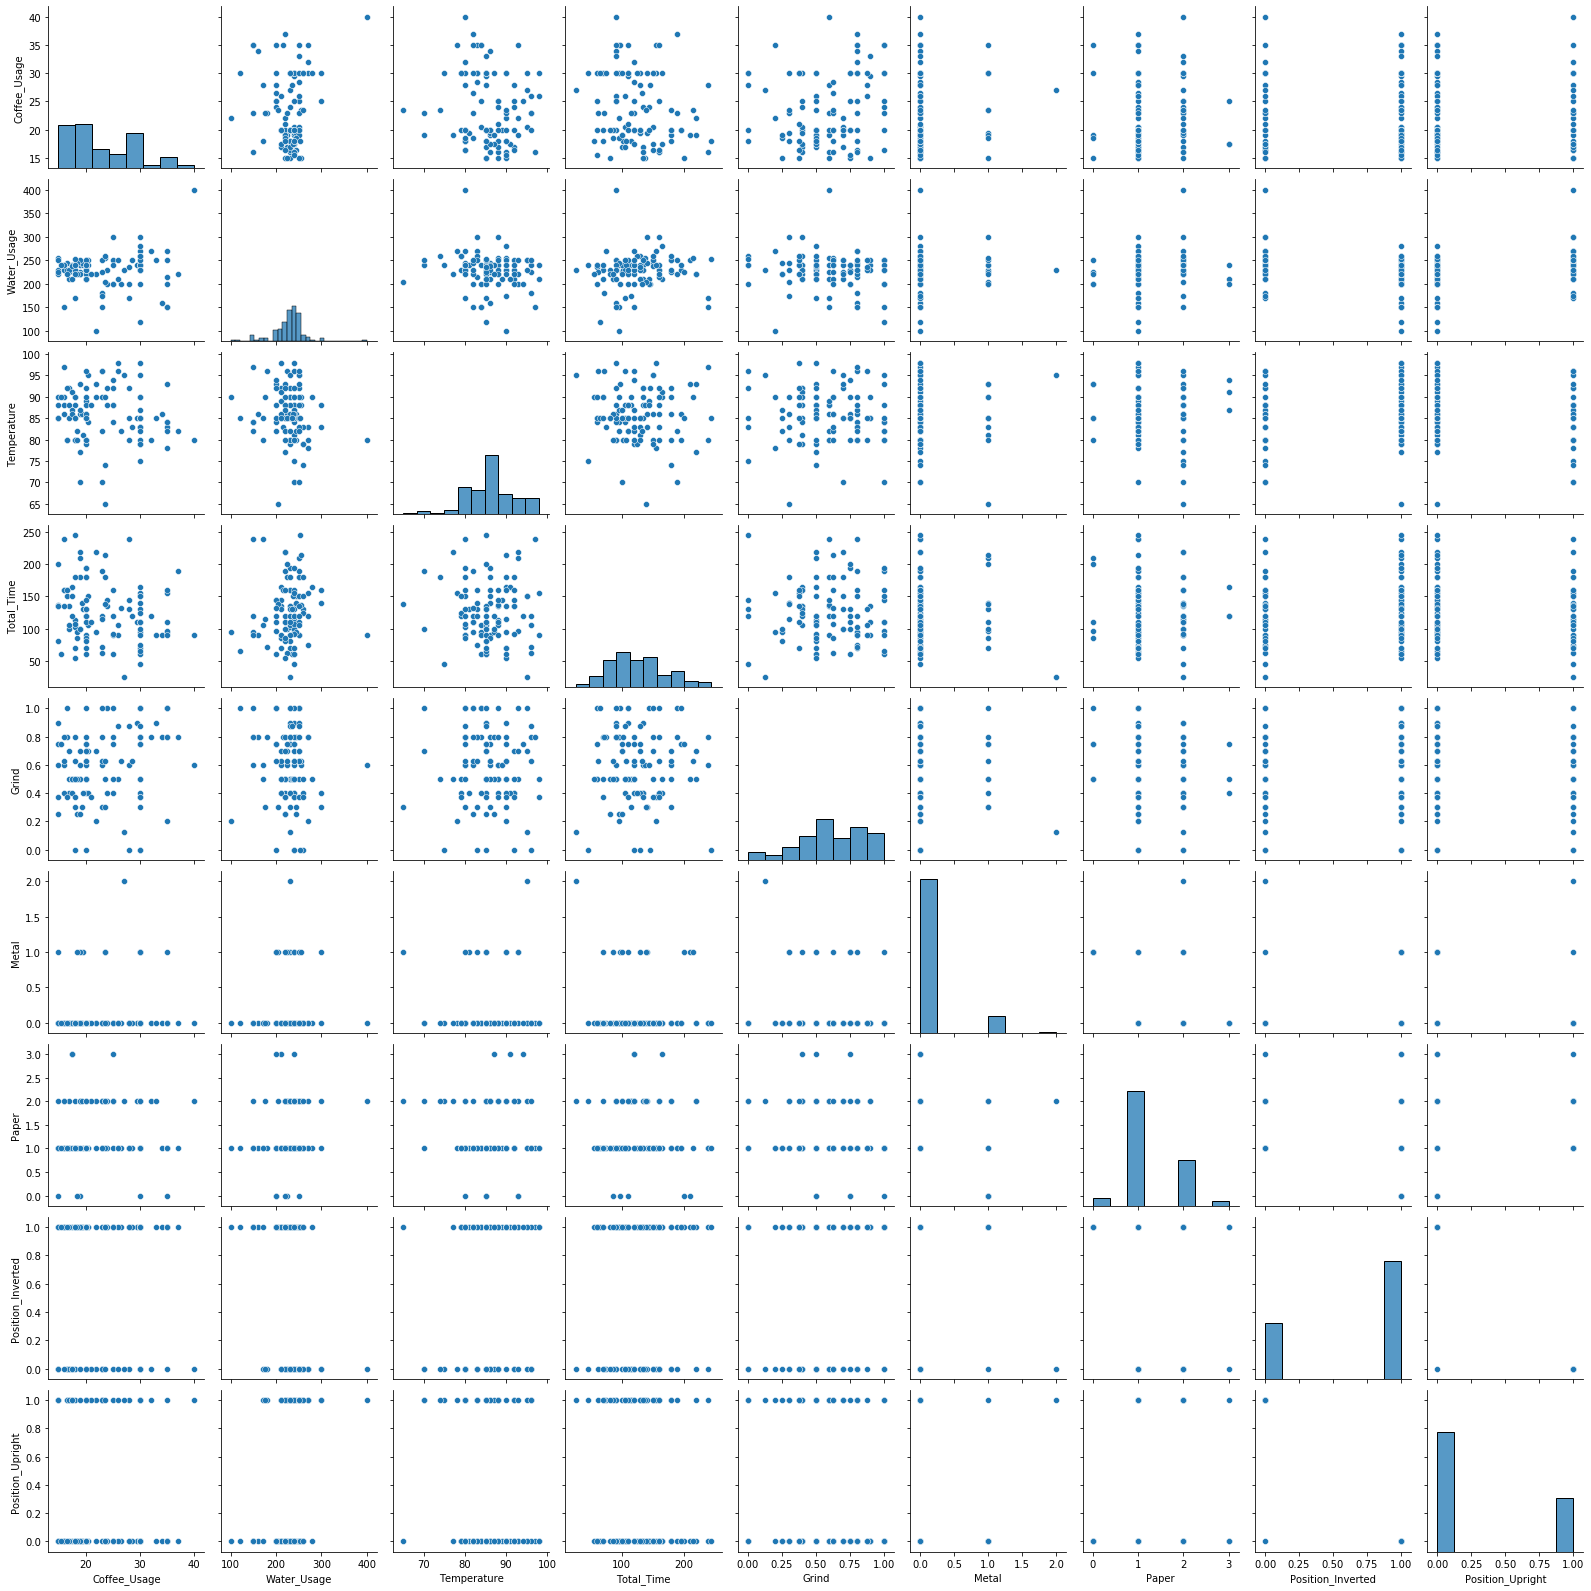

In [22]:
sns.pairplot(data)

In [25]:
y = data.loc[:,["Position_Inverted"]]
X = data.drop(["Position_Inverted","Position_Upright"], axis=1)

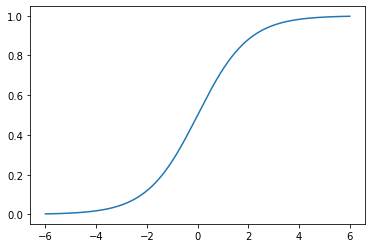

In [44]:
def logistic(z):
    return 1 / (1 + np.exp(-z))


z = np.arange(-6, 6, 0.001)
plt.plot(z, logistic(z))

In [46]:
#Positionに関するロジスティック回帰
result = smf.glm(formula="Position_Inverted ~ Coffee_Usage+Water_Usage+Temperature+Total_Time+Grind+Metal+Paper", data=data, family= sm.families.Binomial()).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      Position_Inverted   No. Observations:                  109
Model:                            GLM   Df Residuals:                      101
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60.839
Date:                Tue, 27 Apr 2021   Deviance:                       121.68
Time:                        03:48:31   Pearson chi2:                     115.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.5820      4.176      0.139      0.889      -7.603       8.767
Coffee_Usage     0.0600      0.042      1.420      0.156      -0.023       0.143
Water_Usage     -0.0212      0.009     -2.319      0.020      -0.039      -0.003
Temperature      0.0410      0.037      1.099      0.272      -0.032       0.114
Total_Time       0.0048      0.005      0.899      0.369      -0.006       0.015
Grind            0.4791      0.913      0.525      0.600      -1.311       2.269
Metal            0.3723      0.679      0.549      0.583      -0.958       1.702
Paper           -0.5416      0.383     -1.413      0.158      -1.293       0.210
================================================================================
"""

0.0212...-1.021倍

In [31]:
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

In [36]:
#Timeに対して正に有意かどうか
results = smf.ols(formula="Total_Time ~ Coffee_Usage + Water_Usage + Grind + Position_Upright + Paper + Metal", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Total_Time   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.118
Date:                Tue, 27 Apr 2021   Prob (F-statistic):              0.357
Time:                        03:15:55   Log-Likelihood:                -566.13
No. Observations:                 109   AIC:                             1146.
Df Residuals:                     102   BIC:                             1165.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          127.2597     33.903  

In [17]:
#Timeに対して正に有意かどうか
results = smf.ols(formula="Total_Time ~ Coffee_Usage + Water_Usage + Grind + Position_Inverted + Paper + Metal", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Total_Time   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.085
Date:                Tue, 27 Apr 2021   Prob (F-statistic):              0.377
Time:                        01:52:26   Log-Likelihood:                -566.23
No. Observations:                 109   AIC:                             1146.
Df Residuals:                     102   BIC:                             1165.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           120.1253     36.17

In [64]:
#クラスター数3
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, random_state=10).fit(data)
# 分類結果のラベルを取得する
labels3 = kmeans_model.labels_
# 分類結果を確認
labels3

array([1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 2, 0, 1,
       2, 2, 1, 0, 1, 1, 1, 2, 2, 0, 2, 2, 2, 1, 1, 2, 0, 2, 1, 1, 2, 1,
       2, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2],
      dtype=int32)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2d1f1c50>,
      dtype=object)

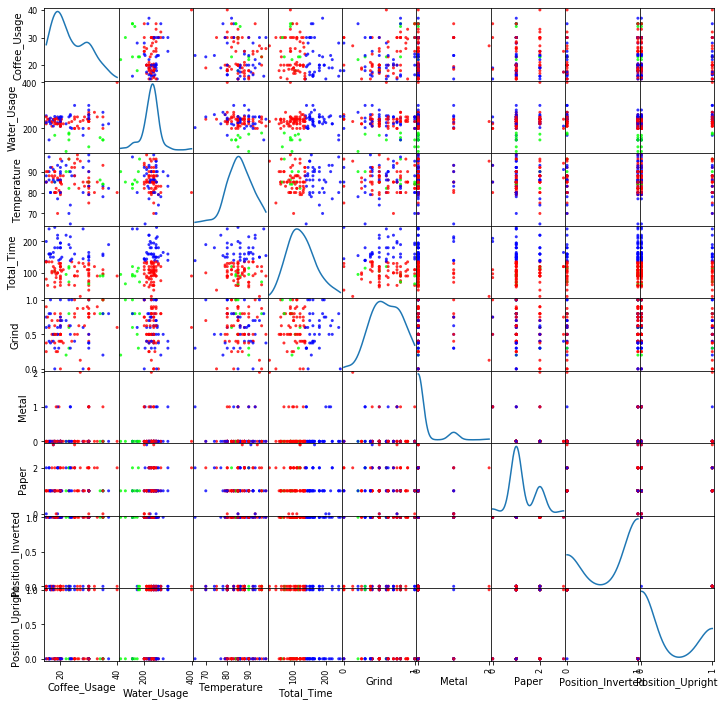

In [62]:
from pandas import plotting
# それぞれに与える色を決める。
color_codes = {0:'#00FF00', 1:'#FF0000', 2:'#0000FF'}
# サンプル毎に色を与える。
colors = [color_codes[x] for x in labels3]
# 色分けした Scatter Matrix を描く。
plotting.scatter_matrix(data, figsize=(12,12), color=colors, alpha=0.8, diagonal='kde')   #データのプロット
# sns.pairplot(data=data, hue=colors)

In [65]:
#クラスター数4
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=4, random_state=10).fit(data)
# 分類結果のラベルを取得する
labels4 = kmeans_model.labels_
# 分類結果を確認
labels4

array([2, 1, 2, 1, 1, 0, 2, 2, 2, 1, 1, 3, 0, 1, 3, 2, 0, 1, 2, 2, 0, 2,
       2, 2, 2, 0, 1, 1, 2, 2, 3, 0, 2, 3, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2,
       3, 2, 3, 2, 2, 0, 1, 2, 1, 3, 1, 1, 1, 3, 2, 1, 2, 1, 2, 1, 1, 1,
       2, 3, 0, 1, 1, 1, 2, 1, 3, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 3, 1, 2,
       3, 2, 1, 1, 3, 3, 2, 3, 3, 1, 2, 2, 2, 1, 1, 1, 1, 3, 1, 1, 2],
      dtype=int32)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a343400f0>,
      dtype=object)

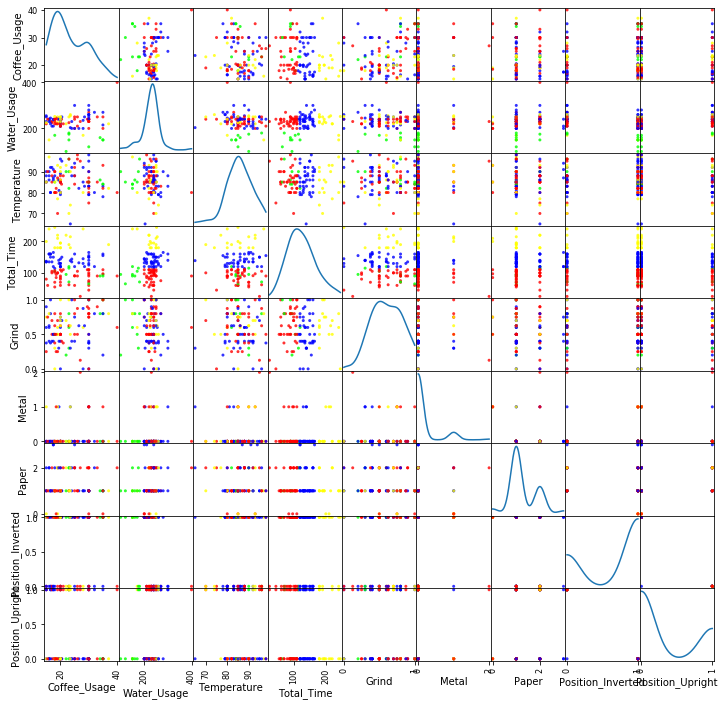

In [66]:
from pandas import plotting
# それぞれに与える色を決める。
color_codes = {0:'#00FF00', 1:'#FF0000', 2:'#0000FF', 3:'#ffff00'}
# サンプル毎に色を与える。
colors = [color_codes[x] for x in labels4]
# 色分けした Scatter Matrix を描く。
plotting.scatter_matrix(data, figsize=(12,12), color=colors, alpha=0.8, diagonal='kde')   #データのプロット
# sns.pairplot(data=data, hue=colors)

In [67]:
#クラスター数5
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=5, random_state=10).fit(data)
# 分類結果のラベルを取得する
labels5 = kmeans_model.labels_
# 分類結果を確認
labels5

array([2, 4, 2, 4, 4, 0, 2, 2, 2, 4, 4, 1, 0, 4, 1, 2, 0, 4, 2, 2, 0, 2,
       2, 2, 2, 0, 4, 4, 2, 2, 1, 0, 2, 1, 2, 2, 3, 2, 0, 2, 4, 2, 2, 2,
       1, 2, 1, 2, 2, 0, 4, 2, 4, 1, 4, 4, 4, 1, 2, 4, 2, 4, 2, 4, 4, 4,
       2, 1, 0, 4, 4, 4, 2, 4, 1, 2, 2, 4, 4, 4, 2, 4, 4, 4, 2, 1, 4, 2,
       1, 2, 4, 4, 1, 1, 2, 1, 1, 4, 2, 2, 2, 4, 4, 4, 4, 1, 4, 4, 2],
      dtype=int32)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a346eb518>,
      dtype=object)

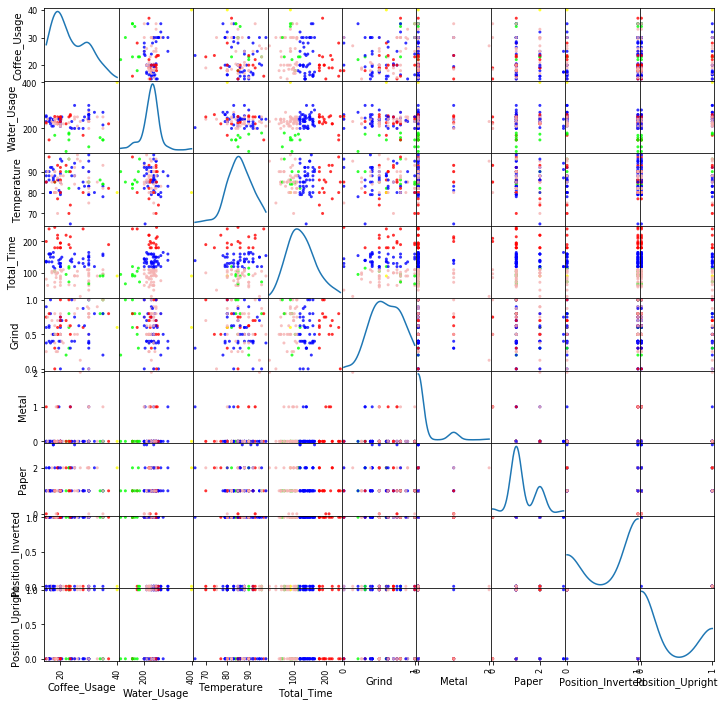

In [68]:
from pandas import plotting
# それぞれに与える色を決める。
color_codes = {0:'#00FF00', 1:'#FF0000', 2:'#0000FF', 3:'#ffff00',4:'#f5b2b2'}
# サンプル毎に色を与える。
colors = [color_codes[x] for x in labels5]
# 色分けした Scatter Matrix を描く。
plotting.scatter_matrix(data, figsize=(12,12), color=colors, alpha=0.8, diagonal='kde')   #データのプロット
# sns.pairplot(data=data, hue=colors)